# Análises de Dinâmica Molecular

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Funções

In [3]:
def converte_xvg(caminho_xvg, nome_colunas):
    
    data = np.loadtxt(caminho_xvg, comments=['#', '@'])
    df_xvg = pd.DataFrame(data)
    df_xvg.columns = nome_colunas
    
    return df_xvg

## Parâmetros de fonte dos gráficos

In [4]:
# Define font sizes
SIZE_DEFAULT = 17
SIZE_LARGE = 17
plt.rc("font", family="Arial")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

## MCR 6mer apo

### RMSD (_Root Mean Square Deviation_)

In [5]:
colunas_rmsd = ['ps', 'nm']

mcr_6mer_apo_rmsd1 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.1.xvg', colunas_rmsd) 
mcr_6mer_apo_rmsd2 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.2.xvg', colunas_rmsd) 
mcr_6mer_apo_rmsd3 = converte_xvg('analises_mcr_6mer_apo/rmsd_ca-ca.3.xvg', colunas_rmsd)

print(mcr_6mer_apo_rmsd1)
mcr_6mer_apo_rmsd1 = mcr_6mer_apo_rmsd1[mcr_6mer_apo_rmsd1["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_apo_rmsd2 = mcr_6mer_apo_rmsd2[mcr_6mer_apo_rmsd2["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_apo_rmsd3 = mcr_6mer_apo_rmsd3[mcr_6mer_apo_rmsd3["ps"] % 1000 == 0].reset_index(drop=True)

mcr_6mer_apo_rmsd1

            ps        nm
0          0.0  0.000001
1        100.0  0.105684
2        200.0  0.112025
3        300.0  0.116837
4        400.0  0.114521
...        ...       ...
1996  199600.0  0.166936
1997  199700.0  0.175907
1998  199800.0  0.176888
1999  199900.0  0.176557
2000  200000.0  0.174437

[2001 rows x 2 columns]


,ps,nm
0,0.0,0.000001
1,1000.0,0.112705
2,2000.0,0.119856
3,3000.0,0.119025
4,4000.0,0.123475
...,...,...
196,196000.0,0.173408
197,197000.0,0.170630
198,198000.0,0.171230
199,199000.0,0.170599


       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000001  0.000001  0.000001    0.000001  0.000000  0.0
1  1000.0  0.112705  0.117234  0.112705    0.114214  0.002615  1.0
2  2000.0  0.119856  0.125937  0.119856    0.121883  0.003511  2.0
3  3000.0  0.119025  0.127829  0.119025    0.121960  0.005083  3.0
4  4000.0  0.123475  0.125687  0.123475    0.124213  0.001277  4.0


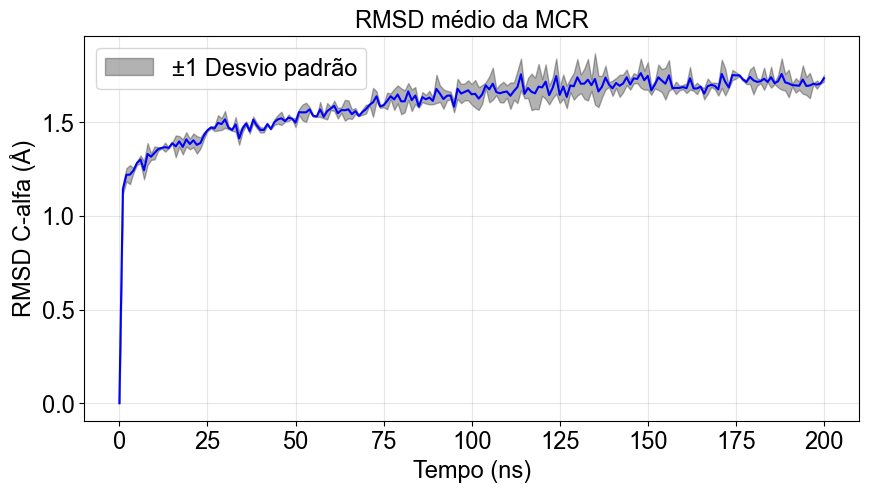

In [6]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mcr_6mer_apo_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mcr_6mer_apo_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mcr_6mer_apo_rmsd1.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da MCR")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSD MCR_APO.jpg', dpi=400)
plt.show()

### RMSF (_Root Mean Square Fluctuation_)

In [7]:
colunas_rmsf = ['Número do resíduo','RMSF']
mcr_6mer_apo_rmsf_chA1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chA2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chA3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chA.3.xvg',colunas_rmsf)


mcr_6mer_apo_rmsf_chB1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chB2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chB3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chB.3.xvg',colunas_rmsf)


mcr_6mer_apo_rmsf_chC1 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.1.xvg', colunas_rmsf)
mcr_6mer_apo_rmsf_chC2 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.2.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chC3 = converte_xvg('analises_mcr_6mer_apo/rmsf_100-200ns_chC.3.xvg',colunas_rmsf)
mcr_6mer_apo_rmsf_chC3

,Número do resíduo,RMSF
0,3001.0,0.4212
1,3002.0,0.2011
2,3003.0,0.1155
3,3004.0,0.1274
4,3005.0,0.0530
...,...,...
243,3244.0,0.0418
244,3245.0,0.0590
245,3246.0,0.0864
246,3247.0,0.0700


In [8]:
df1 = mcr_6mer_apo_rmsf_chA1.rename(columns={"RMSF": "RMSF_1"})
df2 = mcr_6mer_apo_rmsf_chA2.rename(columns={"RMSF": "RMSF_2"})
df3 = mcr_6mer_apo_rmsf_chA3.rename(columns={"RMSF": "RMSF_3"})


df4 = mcr_6mer_apo_rmsf_chB1.rename(columns={"RMSF": "RMSF_4"})
df5 = mcr_6mer_apo_rmsf_chB2.rename(columns={"RMSF": "RMSF_5"})
df6 = mcr_6mer_apo_rmsf_chB3.rename(columns={"RMSF": "RMSF_6"})


df7 = mcr_6mer_apo_rmsf_chC1.rename(columns={"RMSF": "RMSF_7"})
df8 = mcr_6mer_apo_rmsf_chC2.rename(columns={"RMSF": "RMSF_8"})
df9 = mcr_6mer_apo_rmsf_chC3.rename(columns={"RMSF": "RMSF_9"})

# Juntar todos pelo tempo
df_all_1 = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")
df_all_2 = df4.merge(df5, on="Número do resíduo").merge(df6, on="Número do resíduo")
df_all_3 = df7.merge(df8, on="Número do resíduo").merge(df9, on="Número do resíduo")



# Calcular média e desvio padrão
df_all_1["RMSF_media"] = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all_1["RMSF_std"]   = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)


df_all_2["RMSF_media"] = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].mean(axis=1)
df_all_2["RMSF_std"]   = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].std(axis=1)


df_all_3["RMSF_media"] = df_all_3[["RMSF_7", "RMSF_8", "RMSF_9"]].mean(axis=1)
df_all_3["RMSF_std"]   = df_all_3[["RMSF_9", "RMSF_8", "RMSF_9"]].std(axis=1)

print(df_all_1.head(), print())
print(df_all_2.head(), print())
print(df_all_3.head(), print())


   Número do resíduo  RMSF_1  RMSF_2  RMSF_3  RMSF_media  RMSF_std
0             1001.0  0.6407  0.3300  0.3455    0.438733  0.175080
1             1002.0  0.2853  0.1664  0.1165    0.189400  0.086719
2             1003.0  0.2056  0.1368  0.0928    0.145067  0.056853
3             1004.0  0.1676  0.1358  0.1198    0.141067  0.024331
4             1005.0  0.1438  0.0949  0.0797    0.106133  0.033494 None

   Número do resíduo  RMSF_4  RMSF_5  RMSF_6  RMSF_media  RMSF_std
0             2001.0  0.4436  0.3047  0.1890    0.312433  0.127476
1             2002.0  0.1568  0.1921  0.0927    0.147200  0.050391
2             2003.0  0.0998  0.1046  0.0863    0.096900  0.009488
3             2004.0  0.1080  0.1133  0.0939    0.105067  0.010027
4             2005.0  0.0783  0.0769  0.0754    0.076867  0.001450 None

   Número do resíduo  RMSF_7  RMSF_8  RMSF_9  RMSF_media  RMSF_std
0             3001.0  0.4327  0.2763  0.4212    0.376733  0.083658
1             3002.0  0.1569  0.1428  0.2011    0

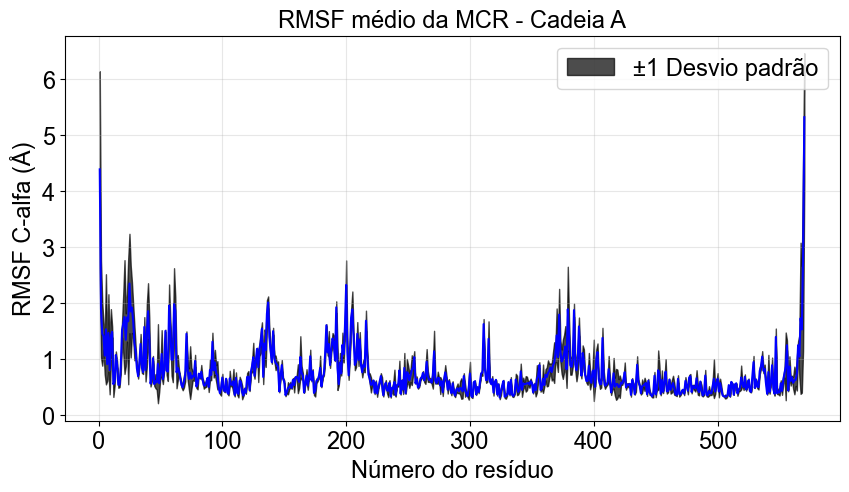

In [9]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_1["Número do resíduo"]-1000, df_all_1["RMSF_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_1["Número do resíduo"]-1000,
    df_all_1["RMSF_media"]*10 - df_all_1["RMSF_std"]*10,
    df_all_1["RMSF_media"]*10 + df_all_1["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia A")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chA MCR_APO.jpg', dpi=400)
plt.show()

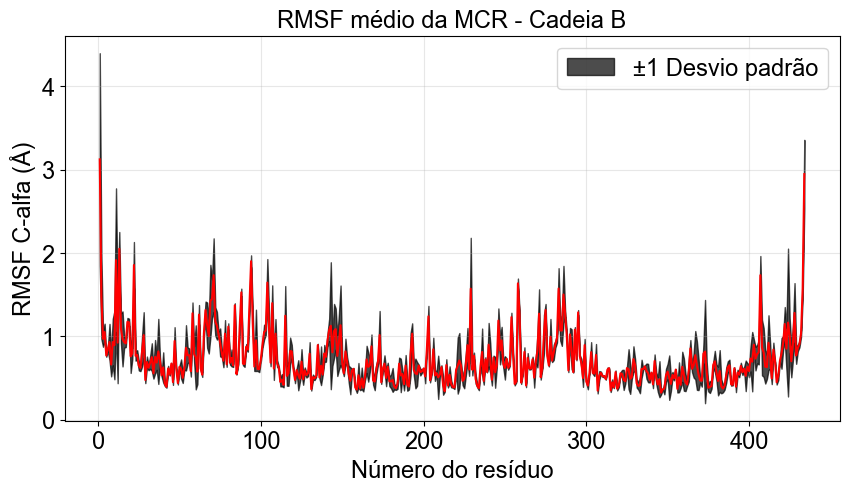

In [10]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_2["Número do resíduo"]-2000, df_all_2["RMSF_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_2["Número do resíduo"]-2000,
    df_all_2["RMSF_media"]*10 - df_all_2["RMSF_std"]*10,
    df_all_2["RMSF_media"]*10 + df_all_2["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia B")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chB MCR_APO.jpg', dpi=400)
plt.show()

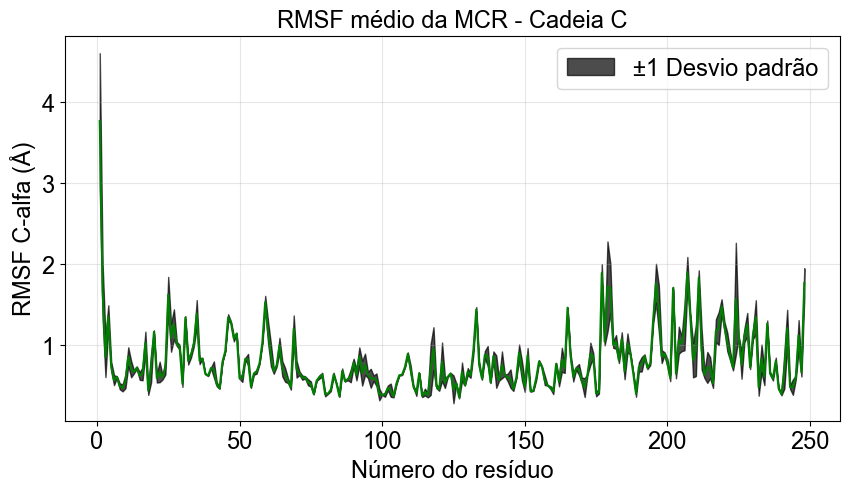

In [11]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_3["Número do resíduo"]-3000, df_all_3["RMSF_media"]*10, color="green") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_3["Número do resíduo"]-3000,
    df_all_3["RMSF_media"]*10 - df_all_3["RMSF_std"]*10,
    df_all_3["RMSF_media"]*10 + df_all_3["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia C")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chC MCR_APO.jpg', dpi=400)
plt.show()

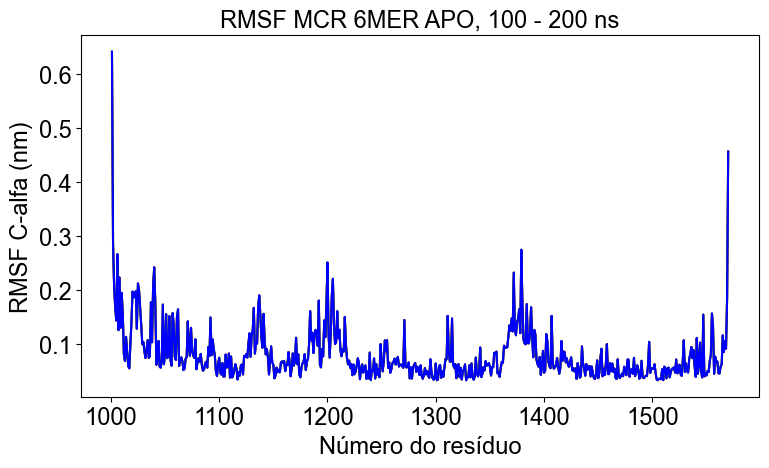

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='r', label='Réplica 1')
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='g', label='Réplica 2')
plt.plot(mcr_6mer_apo_rmsf_chA1['Número do resíduo'], mcr_6mer_apo_rmsf_chA1['RMSF'], color='b', label='Réplica 3')
plt.title('RMSF MCR 6MER APO, 100 - 200 ns')
plt.xlabel('Número do resíduo')
#plt.xlim([990, 1567])
#plt.ylim([0.0, 0.3])
plt.ylabel('RMSF C-alfa (nm)')
fig.tight_layout()
plt.show()

### SASA (_Solvent Accessible Surface Area_)

`sasa.n.xvg` = Área total em função do tempo

`sasa_res.n.xvg`= Área média por resíduo

`sasa_vol.n.xvg` = Área total e densidade em função do átomo

#### Área total em função do tempo

In [13]:
colunas_sasa = ['ps','Área','Área 2?']


mcr_6mer_apo_sasa1 = converte_xvg('analises_mcr_6mer_apo/sasa.1.xvg', colunas_sasa)
mcr_6mer_apo_sasa2 = converte_xvg('analises_mcr_6mer_apo/sasa.2.xvg',colunas_sasa)
mcr_6mer_apo_sasa3 = converte_xvg('analises_mcr_6mer_apo/sasa.3.xvg',colunas_sasa)

mcr_6mer_apo_sasa1

,ps,Área,Área 2?
0,0.0,563.403,563.403
1,1000.0,609.548,609.548
2,2000.0,618.652,618.652
3,3000.0,623.294,623.294
4,4000.0,629.103,629.103
...,...,...,...
196,196000.0,664.338,664.338
197,197000.0,653.680,653.680
198,198000.0,664.984,664.984
199,199000.0,659.352,659.352


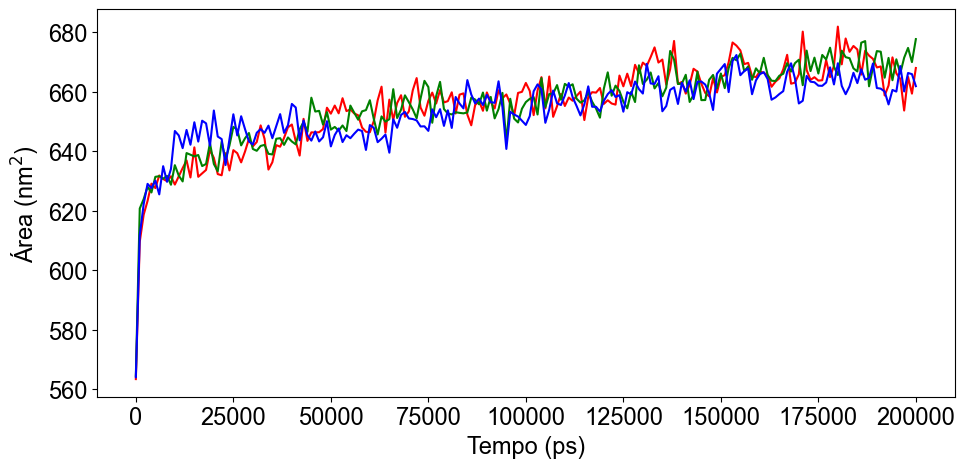

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(mcr_6mer_apo_sasa1['ps'], mcr_6mer_apo_sasa1['Área'], color='r')
plt.plot(mcr_6mer_apo_sasa2['ps'], mcr_6mer_apo_sasa2['Área'], color='g')
plt.plot(mcr_6mer_apo_sasa3['ps'], mcr_6mer_apo_sasa3['Área'], color='b')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
#plt.ylim([620, 680])
fig.tight_layout()
plt.show()

#### Área total e densidade em função do tempo

In [15]:
colunas_sasa_vol = ['ps', 'Área', 'Densidade']

mcr_6mer_apo_sasa_vol1 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.1.xvg', colunas_sasa_vol)
mcr_6mer_apo_sasa_vol2 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.2.xvg',colunas_sasa_vol)
mcr_6mer_apo_sasa_vol3 = converte_xvg('analises_mcr_6mer_apo/sasa_vol.3.xvg',colunas_sasa_vol)

mcr_6mer_apo_sasa_vol1

,ps,Área,Densidade
0,0.0,404.865,1108.895
1,1000.0,421.792,1064.393
2,2000.0,425.131,1056.033
3,3000.0,426.212,1053.355
4,4000.0,426.888,1051.686
...,...,...,...
196,196000.0,433.244,1036.258
197,197000.0,431.841,1039.625
198,198000.0,431.677,1040.021
199,199000.0,430.517,1042.822


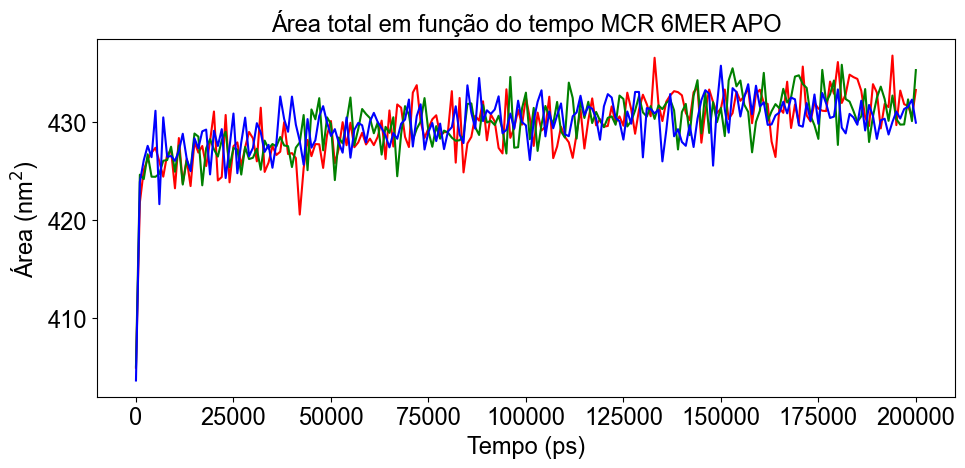

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_sasa_vol1['ps'], mcr_6mer_apo_sasa_vol1['Área'], color='r', label='Réplica 1')
plt.plot(mcr_6mer_apo_sasa_vol2['ps'], mcr_6mer_apo_sasa_vol2['Área'], color='g', label='Réplica 2')
plt.plot(mcr_6mer_apo_sasa_vol3['ps'], mcr_6mer_apo_sasa_vol3['Área'], color='b', label='Réplica 3')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
plt.title('Área total em função do tempo MCR 6MER APO')
fig.tight_layout()
plt.show()

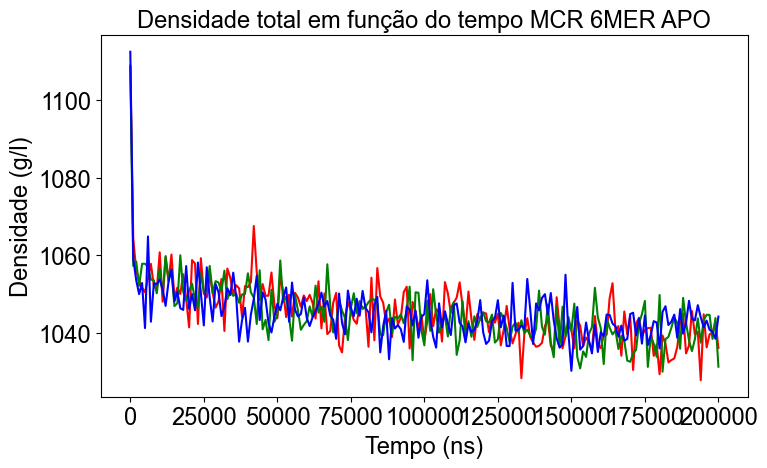

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(mcr_6mer_apo_sasa_vol1['ps'], mcr_6mer_apo_sasa_vol1['Densidade'], color='r')
plt.plot(mcr_6mer_apo_sasa_vol2['ps'], mcr_6mer_apo_sasa_vol2['Densidade'], color='g')
plt.plot(mcr_6mer_apo_sasa_vol3['ps'], mcr_6mer_apo_sasa_vol3['Densidade'], color='b')
plt.ylabel('Densidade (g/l)')
plt.xlabel('Tempo (ns)')
plt.title('Densidade total em função do tempo MCR 6MER APO')
fig.tight_layout()
plt.show()

#### Área média por resíduo

In [18]:
colunas_sasa_res = ['Número do resíduo','1?', '2?', '3?', '4?']

mcr_6mer_apo_sasa_res1 = converte_xvg('analises_mcr_6mer_apo/sasa_res.1.xvg', colunas_sasa_res)
mcr_6mer_apo_sasa_res2 = converte_xvg('analises_mcr_6mer_apo/sasa_res.2.xvg', colunas_sasa_res)
mcr_6mer_apo_sasa_res3 = converte_xvg('analises_mcr_6mer_apo/sasa_res.3.xvg', colunas_sasa_res)

mcr_6mer_apo_sasa_res1

,Número do resíduo,1?,2?,3?,4?
0,1001.0,1.500,0.662,1.500,0.662
1,1002.0,0.511,0.205,0.511,0.205
2,1003.0,0.803,0.161,0.803,0.161
3,1004.0,1.121,0.141,1.121,0.141
4,1005.0,0.274,0.139,0.274,0.139
...,...,...,...,...,...
2499,6244.0,0.016,0.026,0.016,0.026
2500,6245.0,0.375,0.176,0.375,0.176
2501,6246.0,0.681,0.214,0.681,0.214
2502,6247.0,0.122,0.118,0.122,0.118


### RG (_Radius of Gyration_)

In [19]:
colunas_rg = ['ps','Rg','Rg-x','Rg-y','Rg-z']

mcr_6mer_apo_rg1 = converte_xvg('analises_mcr_6mer_apo/rg.1.xvg', colunas_rg)
mcr_6mer_apo_rg2 = converte_xvg('analises_mcr_6mer_apo/rg.2.xvg', colunas_rg)
mcr_6mer_apo_rg3 = converte_xvg('analises_mcr_6mer_apo/rg.3.xvg', colunas_rg)

mcr_6mer_apo_rg1

,ps,Rg,Rg-x,Rg-y,Rg-z
0,0.0,3.685662,2.522099,3.209733,3.241128
1,1000.0,3.747058,2.577684,3.260205,3.287456
2,2000.0,3.748626,2.578248,3.260357,3.290448
3,3000.0,3.748441,2.581034,3.262803,3.285400
4,4000.0,3.751449,2.576773,3.262531,3.295869
...,...,...,...,...,...
196,196000.0,3.785674,2.595236,3.292220,3.329984
197,197000.0,3.780030,2.595982,3.287004,3.321719
198,198000.0,3.782954,2.596103,3.293285,3.322046
199,199000.0,3.783500,2.592507,3.291679,3.327664


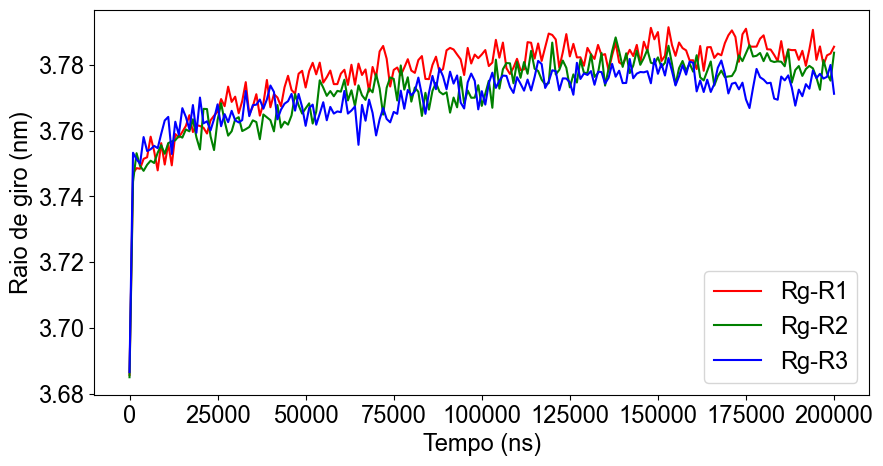

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_rg1['ps'], mcr_6mer_apo_rg1['Rg'], color='r', label='Rg-R1')
plt.plot(mcr_6mer_apo_rg2['ps'], mcr_6mer_apo_rg2['Rg'], color='g', label='Rg-R2')
plt.plot(mcr_6mer_apo_rg3['ps'], mcr_6mer_apo_rg3['Rg'], color='b', label='Rg-R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Raio de giro (nm)')
plt.legend()
plt.show()

### HBOND (_Hydrogen Bonds_)

In [21]:
colunas_hb = ['ps','Lig Feitas','Ligs em potencial']

mcr_6mer_apo_hb1 = converte_xvg('analises_mcr_6mer_apo/hb.1.xvg', colunas_hb)
mcr_6mer_apo_hb2 = converte_xvg('analises_mcr_6mer_apo/hb.2.xvg', colunas_hb)
mcr_6mer_apo_hb3 = converte_xvg('analises_mcr_6mer_apo/hb.3.xvg', colunas_hb)

mcr_6mer_apo_hb1

,ps,Lig Feitas,Ligs em potencial
0,0.0,2540.0,12545.0
1,1000.0,2423.0,12114.0
2,2000.0,2394.0,12136.0
3,3000.0,2408.0,12173.0
4,4000.0,2426.0,12050.0
...,...,...,...
196,196000.0,2272.0,11942.0
197,197000.0,2280.0,11898.0
198,198000.0,2282.0,11945.0
199,199000.0,2290.0,11957.0


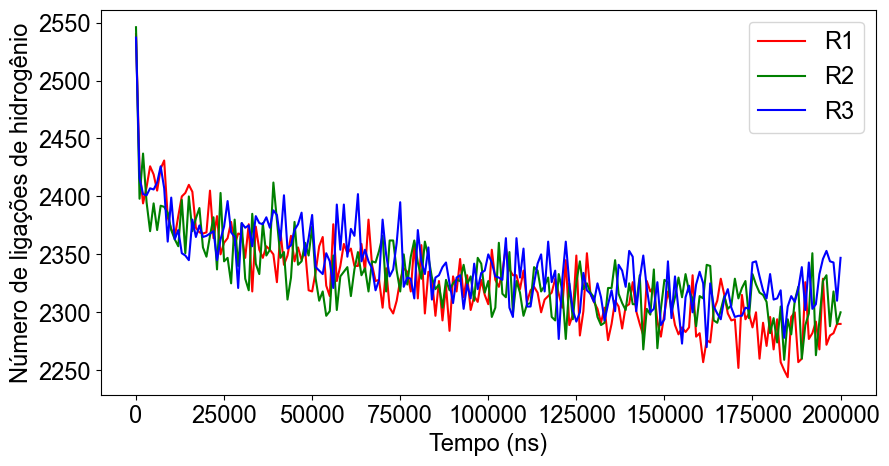

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mcr_6mer_apo_hb1['ps'], mcr_6mer_apo_hb1['Lig Feitas'], color='r', label='R1')
plt.plot(mcr_6mer_apo_hb2['ps'], mcr_6mer_apo_hb2['Lig Feitas'], color='g', label='R2')
plt.plot(mcr_6mer_apo_hb3['ps'], mcr_6mer_apo_hb3['Lig Feitas'], color='b', label='R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Número de ligações de hidrogênio')
plt.legend()
plt.show()

## MER 4mer apo

### RMSD

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(mer_4mer_apo_rmsd1)
    pass

In [24]:
colunas_rmsd = ['ps', 'nm']

mer_4mer_apo_rmsd1 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.1.xvg', colunas_rmsd) 
mer_4mer_apo_rmsd2 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.2.xvg', colunas_rmsd) 
mer_4mer_apo_rmsd3 = converte_xvg('analises_mer_4mer_apo/rmsd_ca-ca.3.xvg', colunas_rmsd)

print(mer_4mer_apo_rmsd1)

           ps        nm
0         0.0  0.000265
1      1000.0  0.185004
2      2000.0  0.198542
3      3000.0  0.196288
4      4000.0  0.205479
..        ...       ...
196  196000.0  0.215483
197  197000.0  0.235010
198  198000.0  0.227765
199  199000.0  0.270126
200  200000.0  0.268158

[201 rows x 2 columns]


       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000265  0.000235  0.000265    0.000255  0.000017  0.0
1  1000.0  0.185004  0.222174  0.185004    0.197394  0.021460  1.0
2  2000.0  0.198542  0.203595  0.198542    0.200226  0.002917  2.0
3  3000.0  0.196288  0.205418  0.196288    0.199331  0.005272  3.0
4  4000.0  0.205479  0.215465  0.205479    0.208808  0.005765  4.0


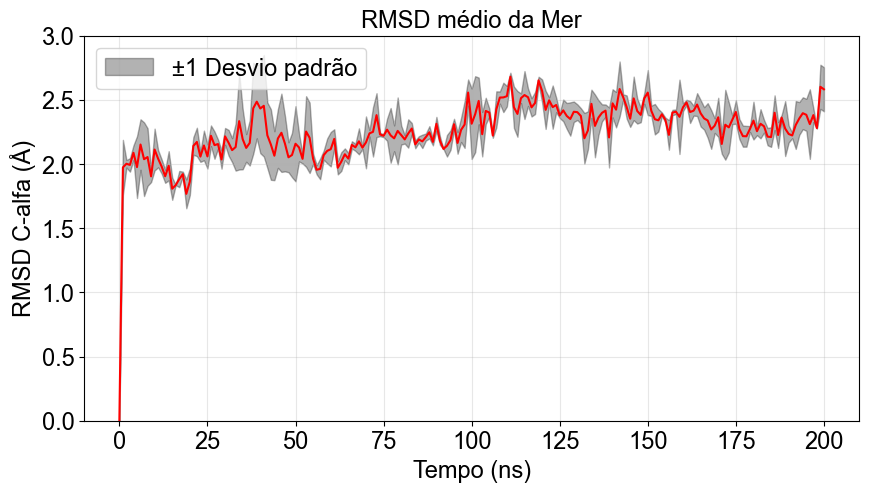

In [25]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mer_4mer_apo_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mer_4mer_apo_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mer_4mer_apo_rmsd1.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da Mer")
plt.legend()
plt.ylim(0, 3.0)
plt.grid(alpha=0.3)
plt.savefig('RMSD Mer_APO.jpg', dpi=400)
plt.show()

### RMSF 

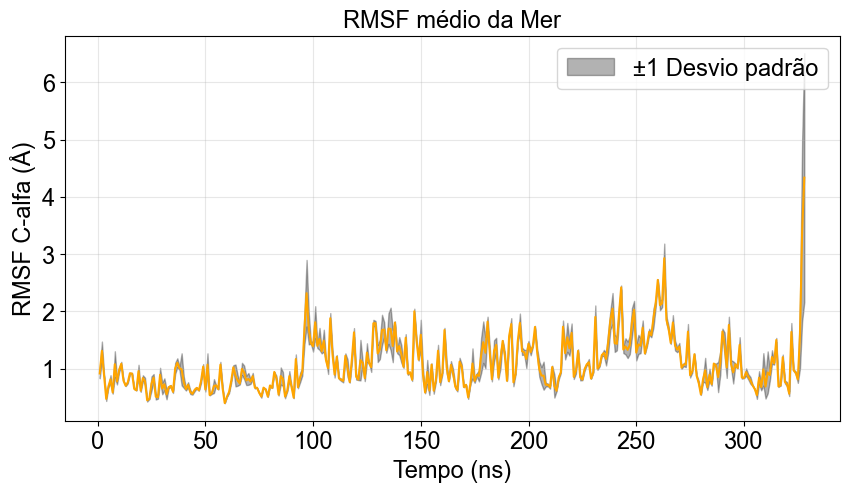

In [26]:
mer_4mer_apo_rmsf1 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.1.xvg', colunas_rmsf) 
mer_4mer_apo_rmsf2 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.2.xvg', colunas_rmsf) 
mer_4mer_apo_rmsf3 = converte_xvg('analises_mer_4mer_apo/rmsf_100-200ns_ch.3.xvg', colunas_rmsf)


df1 = mer_4mer_apo_rmsf1.rename(columns={"RMSF": "RMSF_1"})
df2 = mer_4mer_apo_rmsf2.rename(columns={"RMSF": "RMSF_2"})
df3 = mer_4mer_apo_rmsf1.rename(columns={"RMSF": "RMSF_3"})
#print(df1, df2, df3)


df_all = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")

# Calcular média e desvio padrão
df_all["RMSF_media"] = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all["RMSF_std"]   = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)

# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["Número do resíduo"], df_all["RMSF_media"]*10, color="orange") #label="Média do RMSD"

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["Número do resíduo"],
    df_all["RMSF_media"]*10 - df_all["RMSF_std"]*10,
    df_all["RMSF_media"]*10 + df_all["RMSF_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da Mer")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF Mer_APO.jpg', dpi=400)
plt.show()

## MER 4mer f420

### RMSD

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(mer_4mer_apo_rmsd1)
    pass

In [28]:
colunas_rmsd = ['ps', 'nm']

mer_4mer_f420_rmsd1 = converte_xvg('analises_mer_4mer_f420/rmsd_ca-ca.1.xvg', colunas_rmsd) 
mer_4mer_f420_rmsd2 = converte_xvg('analises_mer_4mer_f420/rmsd_ca-ca.2.xvg', colunas_rmsd) 
mer_4mer_f420_rmsd3 = converte_xvg('analises_mer_4mer_f420/rmsd_ca-ca.3.xvg', colunas_rmsd)

print(mer_4mer_apo_rmsd1)

           ps        nm
0         0.0  0.000265
1      1000.0  0.185004
2      2000.0  0.198542
3      3000.0  0.196288
4      4000.0  0.205479
..        ...       ...
196  196000.0  0.215483
197  197000.0  0.235010
198  198000.0  0.227765
199  199000.0  0.270126
200  200000.0  0.268158

[201 rows x 2 columns]


       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000335  0.000290  0.000335    0.000320  0.000026  0.0
1  1000.0  0.114943  0.113891  0.114943    0.114593  0.000608  1.0
2  2000.0  0.113599  0.131768  0.113599    0.119655  0.010490  2.0
3  3000.0  0.154276  0.115868  0.154276    0.141473  0.022175  3.0
4  4000.0  0.103643  0.124467  0.103643    0.110585  0.012022  4.0


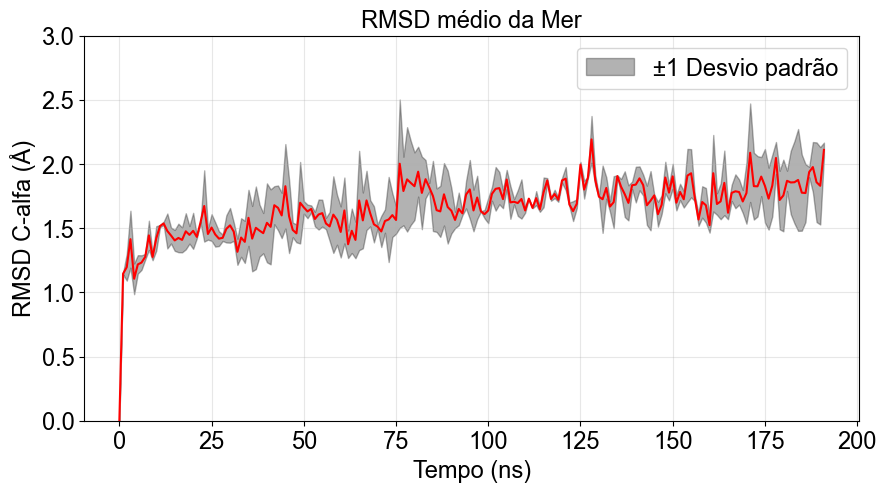

In [29]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mer_4mer_f420_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mer_4mer_f420_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mer_4mer_f420_rmsd1.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da Mer")
plt.legend()
plt.ylim(0, 3.0)
plt.grid(alpha=0.3)
plt.savefig('RMSD Mer_f420.jpg', dpi=400)
plt.show()

### RMSF 

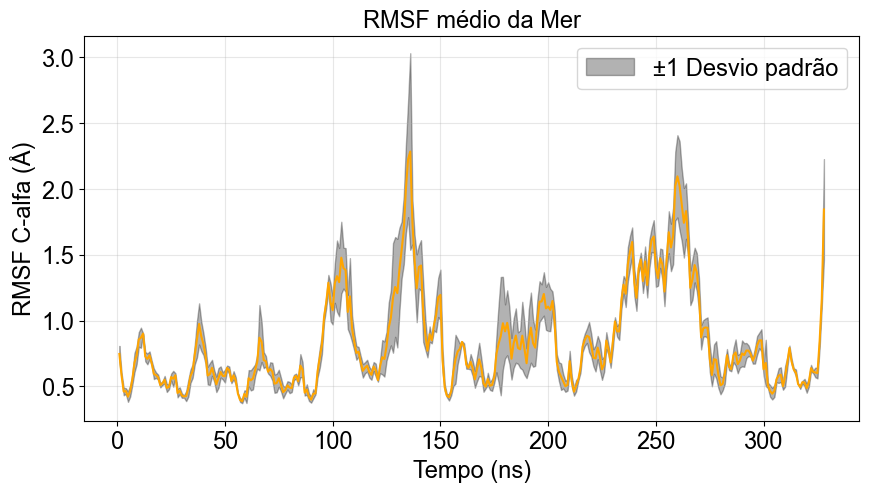

In [30]:
mer_4mer_f420_rmsf1 = converte_xvg('analises_mer_4mer_f420/rmsf_100-200ns.1.xvg', colunas_rmsf) 
mer_4mer_f420_rmsf2 = converte_xvg('analises_mer_4mer_f420/rmsf_100-200ns.2.xvg', colunas_rmsf) 
mer_4mer_f420_rmsf3 = converte_xvg('analises_mer_4mer_f420/rmsf_100-200ns.3.xvg', colunas_rmsf)


df1 = mer_4mer_f420_rmsf1.rename(columns={"RMSF": "RMSF_1"})
df2 = mer_4mer_f420_rmsf2.rename(columns={"RMSF": "RMSF_2"})
df3 = mer_4mer_f420_rmsf3.rename(columns={"RMSF": "RMSF_3"})
#print(df1, df2, df3)


df_all = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")

# Calcular média e desvio padrão
df_all["RMSF_media"] = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all["RMSF_std"]   = df_all[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)

# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["Número do resíduo"], df_all["RMSF_media"]*10, color="orange") #label="Média do RMSD"

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["Número do resíduo"],
    df_all["RMSF_media"]*10 - df_all["RMSF_std"]*10,
    df_all["RMSF_media"]*10 + df_all["RMSF_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da Mer")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF Mer_f420.jpg', dpi=400)
plt.show()

In [61]:
[x[0] for x in df_all[['RMSF_media']].values.tolist()]

[0.07466666666666666,
 0.05846666666666667,
 0.0461,
 0.04643333333333333,
 0.042199999999999994,
 0.046566666666666666,
 0.05503333333333333,
 0.06803333333333333,
 0.07356666666666667,
 0.0857,
 0.08700000000000001,
 0.09013333333333333,
 0.0727,
 0.0709,
 0.07366666666666667,
 0.06763333333333334,
 0.059566666666666664,
 0.05856666666666666,
 0.056999999999999995,
 0.05093333333333333,
 0.052366666666666666,
 0.055066666666666673,
 0.04883333333333333,
 0.04956666666666667,
 0.057100000000000005,
 0.055799999999999995,
 0.05846666666666667,
 0.04496666666666666,
 0.04666666666666666,
 0.04306666666666666,
 0.042300000000000004,
 0.04263333333333333,
 0.048600000000000004,
 0.05776666666666667,
 0.06163333333333334,
 0.07429999999999999,
 0.08583333333333333,
 0.09746666666666666,
 0.08819999999999999,
 0.0822,
 0.07336666666666668,
 0.05826666666666667,
 0.0594,
 0.06413333333333333,
 0.05803333333333333,
 0.05156666666666667,
 0.056433333333333335,
 0.06096666666666667,
 0.05796666

### SASA

#### Área total em função do tempo

In [32]:
colunas_sasa = ['ps','Área','Área 2?']


mer_4mer_f420_sasa1 = converte_xvg('analises_mer_4mer_f420/sasa.1.xvg', colunas_sasa)
mer_4mer_f420_sasa2 = converte_xvg('analises_mer_4mer_f420/sasa.2.xvg',colunas_sasa)
mer_4mer_f420_sasa3 = converte_xvg('analises_mer_4mer_f420/sasa.3.xvg',colunas_sasa)

mcr_6mer_apo_sasa1

,ps,Área,Área 2?
0,0.0,563.403,563.403
1,1000.0,609.548,609.548
2,2000.0,618.652,618.652
3,3000.0,623.294,623.294
4,4000.0,629.103,629.103
...,...,...,...
196,196000.0,664.338,664.338
197,197000.0,653.680,653.680
198,198000.0,664.984,664.984
199,199000.0,659.352,659.352


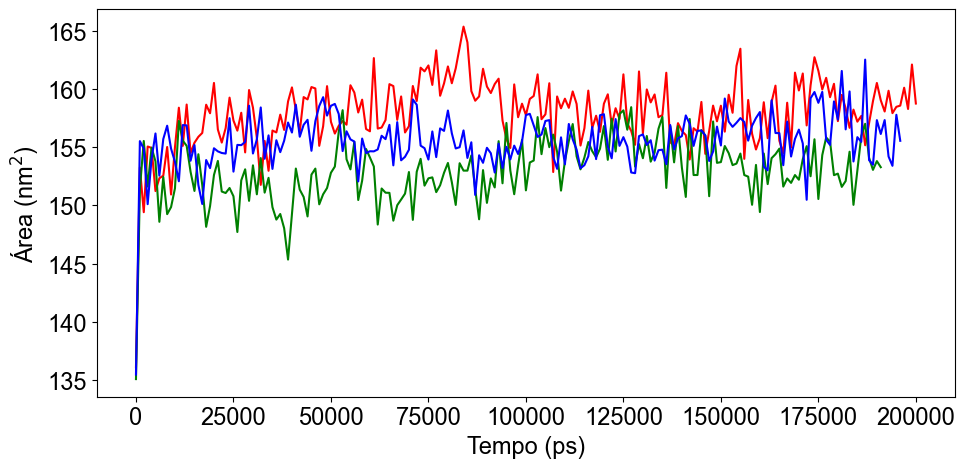

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(mer_4mer_f420_sasa1['ps'], mer_4mer_f420_sasa1['Área'], color='r')
plt.plot(mer_4mer_f420_sasa2['ps'], mer_4mer_f420_sasa2['Área'], color='g')
plt.plot(mer_4mer_f420_sasa3['ps'], mer_4mer_f420_sasa3['Área'], color='b')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
#plt.ylim([620, 680])
fig.tight_layout()
plt.show()

#### Área total e densidade em função do tempo

In [34]:
colunas_sasa_vol = ['ps', 'Área', 'Densidade']

mer_4mer_f420_sasa_vol1 = converte_xvg('analises_mer_4mer_f420/sasa_vol.1.xvg', colunas_sasa_vol)
mer_4mer_f420_sasa_vol2 = converte_xvg('analises_mer_4mer_f420/sasa_vol.2.xvg',colunas_sasa_vol)
mer_4mer_f420_sasa_vol3 = converte_xvg('analises_mer_4mer_f420/sasa_vol.3.xvg',colunas_sasa_vol)

mer_4mer_f420_sasa_vol1

,ps,Área,Densidade
0,0.0,58.269,985.826
1,1000.0,62.070,925.451
2,2000.0,61.421,935.229
3,3000.0,62.958,912.391
4,4000.0,62.143,924.369
...,...,...,...
196,196000.0,61.833,928.994
197,197000.0,62.756,915.327
198,198000.0,62.831,914.239
199,199000.0,63.685,901.982


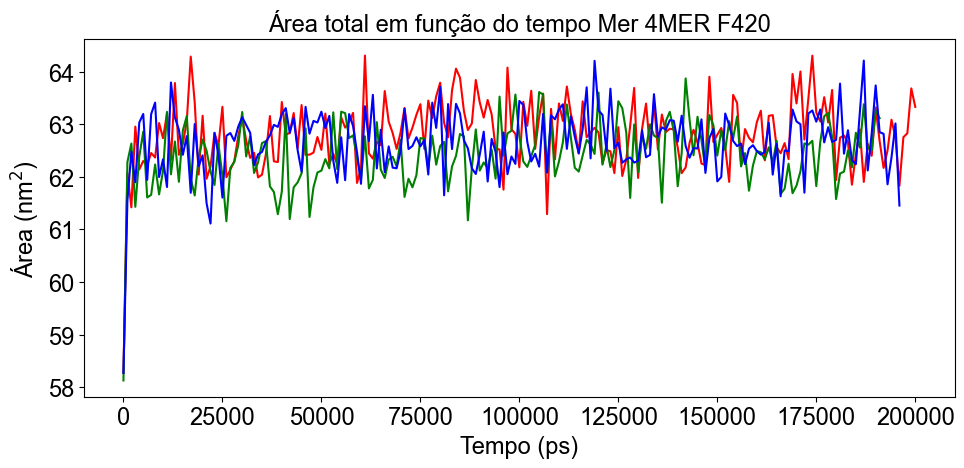

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mer_4mer_f420_sasa_vol1['ps'], mer_4mer_f420_sasa_vol1['Área'], color='r', label='Réplica 1')
plt.plot(mer_4mer_f420_sasa_vol2['ps'], mer_4mer_f420_sasa_vol2['Área'], color='g', label='Réplica 2')
plt.plot(mer_4mer_f420_sasa_vol3['ps'], mer_4mer_f420_sasa_vol3['Área'], color='b', label='Réplica 3')
plt.xlabel('Tempo (ps)')
plt.ylabel('Área (nm$^2$)')
plt.title('Área total em função do tempo Mer 4MER F420')
fig.tight_layout()
plt.show()

#### Área média por resíduo

In [36]:
colunas_sasa_res = ['Número do resíduo','1?', '2?', '3?', '4?']

mer_4mer_f420_sasa_res1 = converte_xvg('analises_mer_4mer_f420/sasa_res.1.xvg', colunas_sasa_res)
mer_4mer_f420_sasa_res2 = converte_xvg('analises_mer_4mer_f420/sasa_res.2.xvg', colunas_sasa_res)
mer_4mer_f420_sasa_res3 = converte_xvg('analises_mer_4mer_f420/sasa_res.3.xvg', colunas_sasa_res)

mer_4mer_f420_sasa_res1

,Número do resíduo,1?,2?,3?,4?
0,1.0,0.516,0.143,0.516,0.143
1,2.0,1.185,0.235,1.185,0.235
2,3.0,0.036,0.036,0.036,0.036
3,4.0,0.013,0.017,0.013,0.017
4,5.0,0.001,0.007,0.001,0.007
...,...,...,...,...,...
323,324.0,0.065,0.070,0.065,0.070
324,325.0,0.412,0.132,0.412,0.132
325,326.0,0.730,0.145,0.730,0.145
326,327.0,1.364,0.347,1.364,0.347


### RG

In [37]:
colunas_rg = ['ps','Rg','Rg-x','Rg-y','Rg-z']

mer_4mer_f420_rg1 = converte_xvg('analises_mer_4mer_f420/rg.1.xvg', colunas_rg)
mer_4mer_f420_rg2 = converte_xvg('analises_mer_4mer_f420/rg.2.xvg', colunas_rg)
mer_4mer_f420_rg3 = converte_xvg('analises_mer_4mer_f420/rg.3.xvg', colunas_rg)

mer_4mer_f420_rg1

,ps,Rg,Rg-x,Rg-y,Rg-z
0,0.0,1.906426,1.583835,1.369577,1.698426
1,1000.0,1.973958,1.635267,1.420821,1.760734
2,2000.0,1.975248,1.625937,1.434419,1.761245
3,3000.0,2.000541,1.661511,1.434789,1.784682
4,4000.0,1.975180,1.632334,1.437957,1.752265
...,...,...,...,...,...
196,196000.0,2.004003,1.669889,1.438442,1.781687
197,197000.0,1.995671,1.662200,1.437025,1.771286
198,198000.0,1.985558,1.658150,1.428930,1.758857
199,199000.0,1.997905,1.671677,1.433129,1.770564


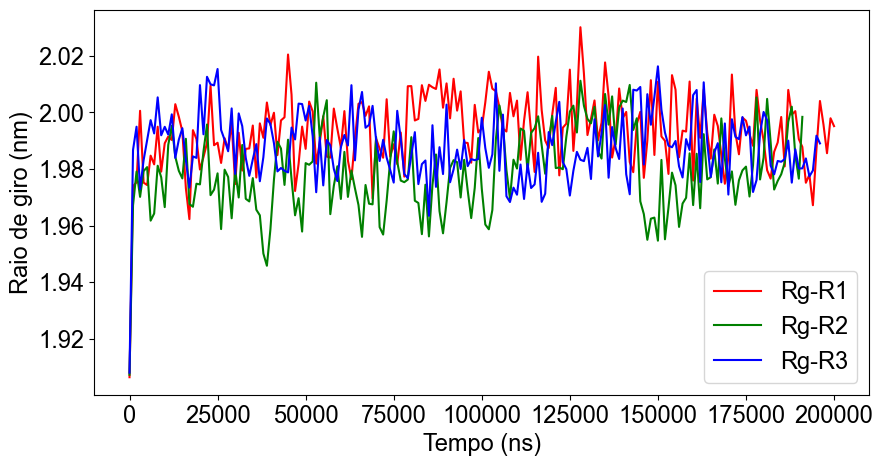

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mer_4mer_f420_rg1['ps'], mer_4mer_f420_rg1['Rg'], color='r', label='Rg-R1')
plt.plot(mer_4mer_f420_rg2['ps'], mer_4mer_f420_rg2['Rg'], color='g', label='Rg-R2')
plt.plot(mer_4mer_f420_rg3['ps'], mer_4mer_f420_rg3['Rg'], color='b', label='Rg-R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Raio de giro (nm)')
plt.legend()
plt.show()

### HBOND

In [39]:
colunas_hb = ['ps','Lig Feitas','Ligs em potencial']

mer_4mer_f420_hb1 = converte_xvg('analises_mer_4mer_f420/hb.1.xvg', colunas_hb)
mer_4mer_f420_hb2 = converte_xvg('analises_mer_4mer_f420/hb.2.xvg', colunas_hb)
mer_4mer_f420_hb3 = converte_xvg('analises_mer_4mer_f420/hb.3.xvg', colunas_hb)

mer_4mer_f420_hb1

,ps,Lig Feitas,Ligs em potencial
0,0.0,292.0,1509.0
1,1000.0,253.0,1424.0
2,2000.0,229.0,1441.0
3,3000.0,243.0,1413.0
4,4000.0,240.0,1409.0
...,...,...,...
196,196000.0,228.0,1415.0
197,197000.0,239.0,1386.0
198,198000.0,234.0,1403.0
199,199000.0,240.0,1450.0


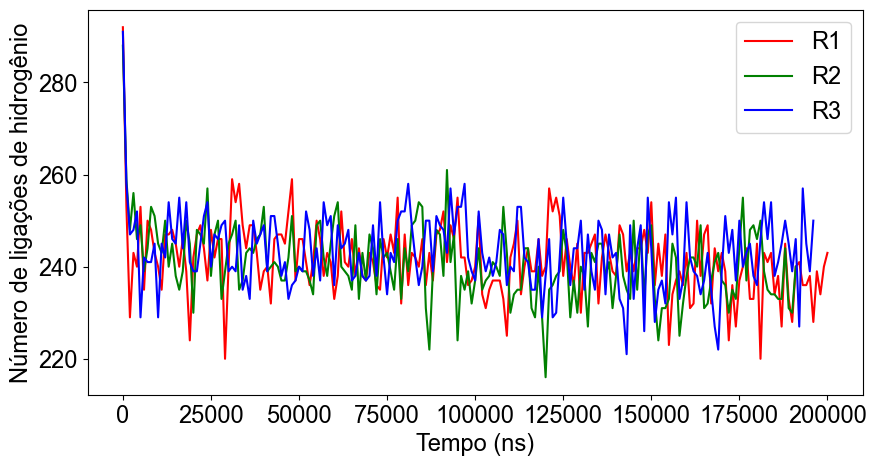

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(mer_4mer_f420_hb1['ps'], mer_4mer_f420_hb1['Lig Feitas'], color='r', label='R1')
plt.plot(mer_4mer_f420_hb2['ps'], mer_4mer_f420_hb2['Lig Feitas'], color='g', label='R2')
plt.plot(mer_4mer_f420_hb3['ps'], mer_4mer_f420_hb3['Lig Feitas'], color='b', label='R3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Tempo (ns)')
plt.ylabel('Número de ligações de hidrogênio')
plt.legend()
plt.show()

## MCR 6mer holo

### RMSD 

In [41]:
colunas_rmsd = ['ps', 'nm']

mcr_6mer_holo_rmsd1 = converte_xvg('analises_mcr_6mer_holo/2.0_rmsd_ca-ca.1.xvg', colunas_rmsd) 
mcr_6mer_holo_rmsd2 = converte_xvg('analises_mcr_6mer_holo/2.0_rmsd_ca-ca.2.xvg', colunas_rmsd) 
mcr_6mer_holo_rmsd3 = converte_xvg('analises_mcr_6mer_holo/2.0_rmsd_ca-ca.3.xvg', colunas_rmsd)

print(mcr_6mer_apo_rmsd1)
mcr_6mer_holo_rmsd1 = mcr_6mer_holo_rmsd1[mcr_6mer_holo_rmsd1["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_holo_rmsd2 = mcr_6mer_holo_rmsd2[mcr_6mer_holo_rmsd2["ps"] % 1000 == 0].reset_index(drop=True)
mcr_6mer_holo_rmsd3 = mcr_6mer_holo_rmsd3[mcr_6mer_holo_rmsd3["ps"] % 1000 == 0].reset_index(drop=True)

mcr_6mer_holo_rmsd1

           ps        nm
0         0.0  0.000001
1      1000.0  0.112705
2      2000.0  0.119856
3      3000.0  0.119025
4      4000.0  0.123475
..        ...       ...
196  196000.0  0.173408
197  197000.0  0.170630
198  198000.0  0.171230
199  199000.0  0.170599
200  200000.0  0.174437

[201 rows x 2 columns]


,ps,nm
0,0.0,0.000048
1,1000.0,0.123386
2,2000.0,0.143843
3,3000.0,0.143365
4,4000.0,0.150733
...,...,...
196,196000.0,0.209862
197,197000.0,0.209035
198,198000.0,0.209486
199,199000.0,0.208999


       ps    RMSD_1    RMSD_2    RMSD_3  RMSD_media  RMSD_std   ns
0     0.0  0.000048  0.000040  0.000029    0.000039  0.000009  0.0
1  1000.0  0.123386  0.132623  0.131114    0.129041  0.004955  1.0
2  2000.0  0.143843  0.141444  0.131042    0.138776  0.006805  2.0
3  3000.0  0.143365  0.147102  0.140824    0.143764  0.003158  3.0
4  4000.0  0.150733  0.145074  0.142990    0.146266  0.004006  4.0


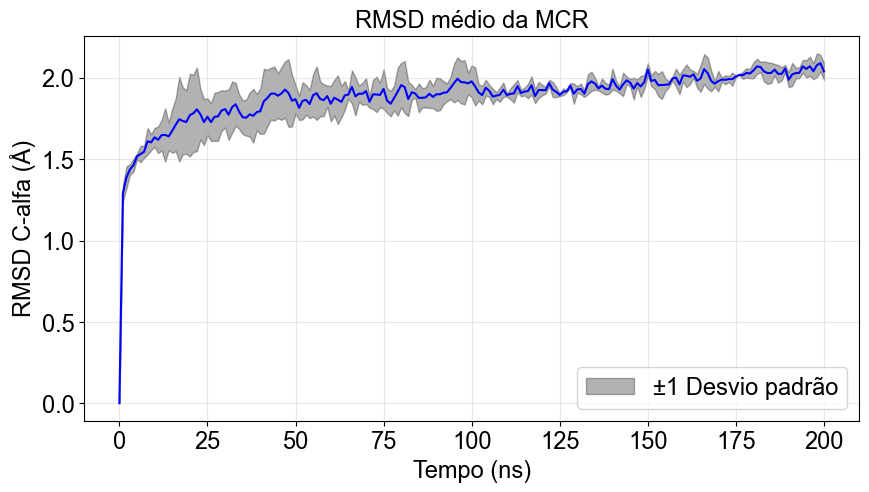

In [42]:
# Exemplo: df1, df2 e df3 são suas replicatas
# Cada um tem colunas: "tempo" (ns), "RMSD" (Å)

# Renomear colunas de RMSD para identificar cada replicata
df1 = mcr_6mer_holo_rmsd1.rename(columns={"nm": "RMSD_1"})
df2 = mcr_6mer_holo_rmsd2.rename(columns={"nm": "RMSD_2"})
df3 = mcr_6mer_holo_rmsd3.rename(columns={"nm": "RMSD_3"})

# Juntar todos pelo tempo
df_all = df1.merge(df2, on="ps").merge(df3, on="ps")

# Calcular média e desvio padrão
df_all["RMSD_media"] = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].mean(axis=1)
df_all["RMSD_std"]   = df_all[["RMSD_1", "RMSD_2", "RMSD_3"]].std(axis=1)
df_all["ns"] = df_all["ps"] / 1000

print(df_all.head())


# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all["ns"], df_all["RMSD_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all["ns"],
    df_all["RMSD_media"]*10 - df_all["RMSD_std"]*10,
    df_all["RMSD_media"]*10 + df_all["RMSD_std"]*10,
    color="black",
    alpha=0.3,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Tempo (ns)")
plt.ylabel("RMSD C-alfa (Å)")
plt.title("RMSD médio da MCR")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSD MCR_HOLO.jpg', dpi=400)
plt.show()

### RMSF

In [43]:
colunas_rmsf = ['Número do resíduo','RMSF']
mcr_6mer_holo_rmsf_chA1 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chA.1.xvg', colunas_rmsf)
mcr_6mer_holo_rmsf_chA2 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chA.2.xvg',colunas_rmsf)
mcr_6mer_holo_rmsf_chA3 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chA.3.xvg',colunas_rmsf)


mcr_6mer_holo_rmsf_chB1 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chB.1.xvg', colunas_rmsf)
mcr_6mer_holo_rmsf_chB2 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chB.2.xvg',colunas_rmsf)
mcr_6mer_holo_rmsf_chB3 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chB.3.xvg',colunas_rmsf)


mcr_6mer_holo_rmsf_chC1 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chC.1.xvg', colunas_rmsf)
mcr_6mer_holo_rmsf_chC2 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chC.2.xvg',colunas_rmsf)
mcr_6mer_holo_rmsf_chC3 = converte_xvg('analises_mcr_6mer_holo/rmsf_100-200ns_chC.3.xvg',colunas_rmsf)
mcr_6mer_holo_rmsf_chC3

,Número do resíduo,RMSF
0,3001.0,0.3720
1,3002.0,0.1417
2,3003.0,0.0763
3,3004.0,0.0571
4,3005.0,0.0410
...,...,...
243,3244.0,0.1040
244,3245.0,0.1060
245,3246.0,0.0923
246,3247.0,0.1045


In [44]:
df1 = mcr_6mer_holo_rmsf_chA1.rename(columns={"RMSF": "RMSF_1"})
df2 = mcr_6mer_holo_rmsf_chA2.rename(columns={"RMSF": "RMSF_2"})
df3 = mcr_6mer_holo_rmsf_chA3.rename(columns={"RMSF": "RMSF_3"})


df4 = mcr_6mer_holo_rmsf_chB1.rename(columns={"RMSF": "RMSF_4"})
df5 = mcr_6mer_holo_rmsf_chB2.rename(columns={"RMSF": "RMSF_5"})
df6 = mcr_6mer_holo_rmsf_chB3.rename(columns={"RMSF": "RMSF_6"})


df7 = mcr_6mer_holo_rmsf_chC1.rename(columns={"RMSF": "RMSF_7"})
df8 = mcr_6mer_holo_rmsf_chC2.rename(columns={"RMSF": "RMSF_8"})
df9 = mcr_6mer_holo_rmsf_chC3.rename(columns={"RMSF": "RMSF_9"})

# Juntar todos pelo tempo
df_all_1 = df1.merge(df2, on="Número do resíduo").merge(df3, on="Número do resíduo")
df_all_2 = df4.merge(df5, on="Número do resíduo").merge(df6, on="Número do resíduo")
df_all_3 = df7.merge(df8, on="Número do resíduo").merge(df9, on="Número do resíduo")



# Calcular média e desvio padrão
df_all_1["RMSF_media"] = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].mean(axis=1)
df_all_1["RMSF_std"]   = df_all_1[["RMSF_1", "RMSF_2", "RMSF_3"]].std(axis=1)


df_all_2["RMSF_media"] = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].mean(axis=1)
df_all_2["RMSF_std"]   = df_all_2[["RMSF_4", "RMSF_5", "RMSF_6"]].std(axis=1)


df_all_3["RMSF_media"] = df_all_3[["RMSF_7", "RMSF_8", "RMSF_9"]].mean(axis=1)
df_all_3["RMSF_std"]   = df_all_3[["RMSF_9", "RMSF_8", "RMSF_9"]].std(axis=1)

print(df_all_1.head(), print())
print(df_all_2.head(), print())
print(df_all_3.head(), print())


   Número do resíduo  RMSF_1  RMSF_2  RMSF_3  RMSF_media  RMSF_std
0             1001.0  0.9012  0.1146  0.2936    0.436467  0.412302
1             1002.0  0.6421  0.1258  0.1166    0.294833  0.300777
2             1003.0  0.3802  0.1089  0.0817    0.190267  0.165048
3             1004.0  0.1207  0.1114  0.0698    0.100633  0.027104
4             1005.0  0.0945  0.0952  0.0664    0.085367  0.016429 None

   Número do resíduo  RMSF_4  RMSF_5  RMSF_6  RMSF_media  RMSF_std
0             2001.0  0.1689  0.6468  0.4947    0.436800  0.244154
1             2002.0  0.1344  0.4178  0.3301    0.294100  0.145089
2             2003.0  0.0831  0.1927  0.1522    0.142667  0.055418
3             2004.0  0.0627  0.0887  0.0683    0.073233  0.013684
4             2005.0  0.0605  0.0746  0.0592    0.064767  0.008541 None

   Número do resíduo  RMSF_7  RMSF_8  RMSF_9  RMSF_media  RMSF_std
0             3001.0  0.4176  0.2643  0.3720    0.351300  0.062181
1             3002.0  0.2540  0.1735  0.1417    0

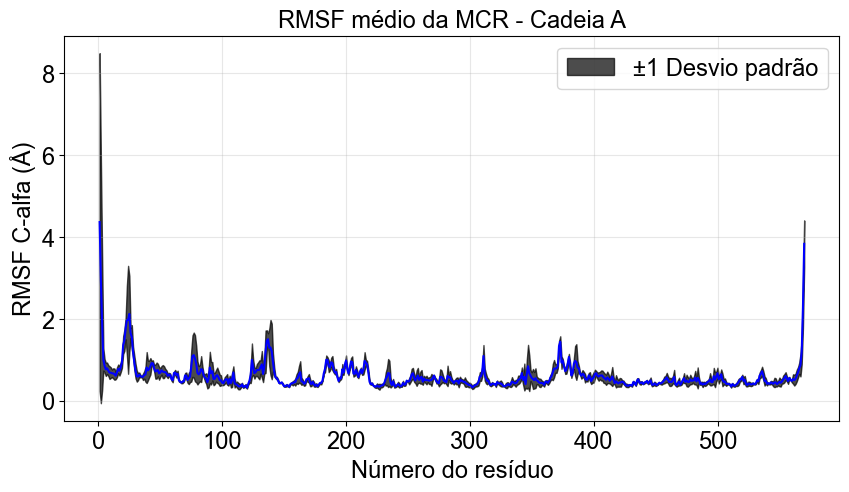

In [45]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_1["Número do resíduo"]-1000, df_all_1["RMSF_media"]*10, color="blue") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_1["Número do resíduo"]-1000,
    df_all_1["RMSF_media"]*10 - df_all_1["RMSF_std"]*10,
    df_all_1["RMSF_media"]*10 + df_all_1["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia A")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chA MCR_HOLO.jpg', dpi=400)
plt.show()

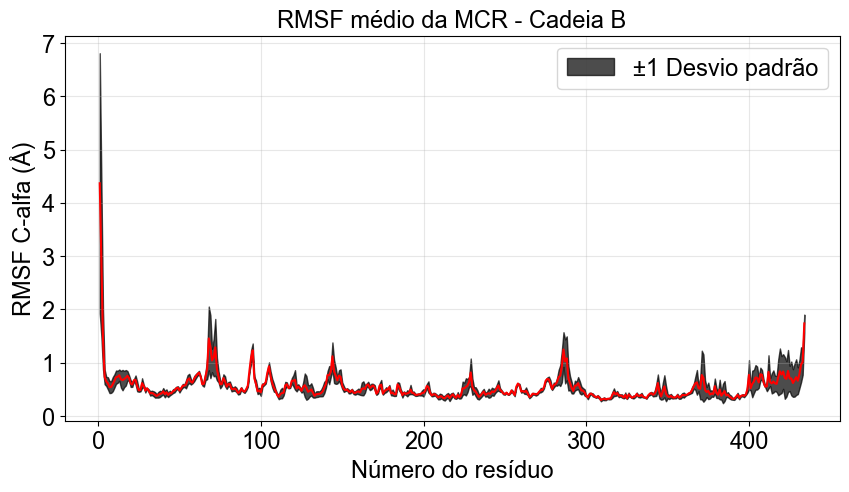

In [46]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_2["Número do resíduo"]-2000, df_all_2["RMSF_media"]*10, color="red") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_2["Número do resíduo"]-2000,
    df_all_2["RMSF_media"]*10 - df_all_2["RMSF_std"]*10,
    df_all_2["RMSF_media"]*10 + df_all_2["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia B")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chB MCR_HOLO.jpg', dpi=400)
plt.show()

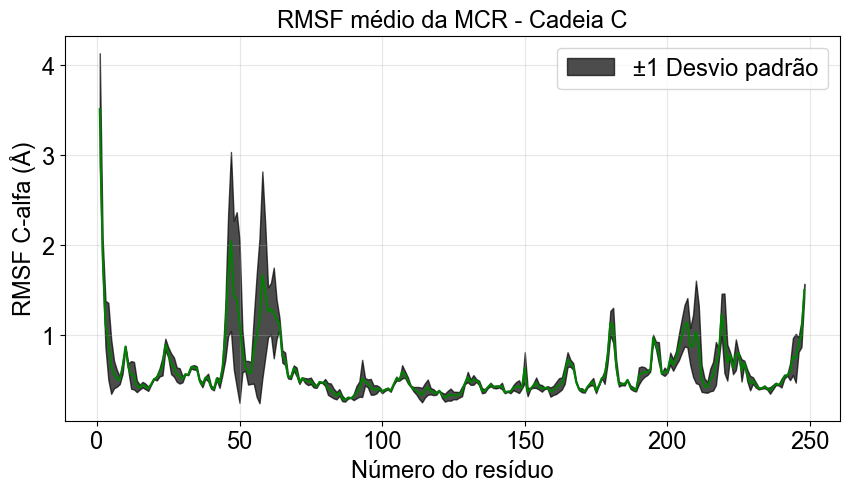

In [47]:
# Plot da média
plt.figure(figsize=(10,5))
plt.plot(df_all_3["Número do resíduo"]-3000, df_all_3["RMSF_media"]*10, color="green") #label="Média do RMSD")

# Faixa do desvio padrão (sombreada)
plt.fill_between(
    df_all_3["Número do resíduo"]-3000,
    df_all_3["RMSF_media"]*10 - df_all_3["RMSF_std"]*10,
    df_all_3["RMSF_media"]*10 + df_all_3["RMSF_std"]*10,
    color="black",
    alpha=0.7,
    label="±1 Desvio padrão"
)

# Detalhes do gráfico
plt.xlabel("Número do resíduo")
plt.ylabel("RMSF C-alfa (Å)")
plt.title("RMSF médio da MCR - Cadeia C")
#plt.ylim(0, 1.75)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('RMSF chC MCR_HOLO.jpg', dpi=400)
plt.show()